## Gunjan Chakraborty

### USN: 22MSRDS007

#### Import necessary libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load the Iris dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

#### Split the dataset into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.37, random_state=42)

In [4]:
# Create a Decision Tree Classifier with reduced max_depth
cart_model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=12)

# Train the model on the training data
cart_model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = cart_model.predict(X_train)
y_test_pred = cart_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Use cross-validation to get a more reliable estimate of model performance
cv_scores = cross_val_score(cart_model, X_train, y_train, cv=5)

# Generate classification reports for training and testing data
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Generate confusion matrices for training and testing data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

### Print the results

In [5]:
print(f'Training Accuracy: {train_accuracy:.3f}')
print(f'Testing Accuracy: {test_accuracy:.3f}')
print(f'Cross-validated Accuracy: {cv_scores.mean():.3f}')

print("\nClassification Report (Training):")
print(train_report)

print("\nClassification Report (Testing):")
print(test_report)

print("\nConfusion Matrix (Training):")
print(train_conf_matrix)

print("\nConfusion Matrix (Testing):")
print(test_conf_matrix)

Training Accuracy: 0.968
Testing Accuracy: 0.982
Cross-validated Accuracy: 0.915

Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.94      0.97      0.95        32
           2       0.97      0.94      0.95        32

    accuracy                           0.97        94
   macro avg       0.97      0.97      0.97        94
weighted avg       0.97      0.97      0.97        94


Classification Report (Testing):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        18

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56


Confusion Matrix (Training):
[[30  0  0]
 [ 0 31  1]
 [ 0  2 30]]

Confusion Matrix (Te

## Gini Index

In [6]:
# Create a Decision Tree Classifier with Gini Index criterion
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

In [7]:
# Fit the classifier on the training data
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Make predictions on the test data
y_pred_gini = clf_gini.predict(X_test)

In [9]:
y_pred_gini

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1])

In [10]:
# Evaluate the model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f'Accuracy using Gini Index: {accuracy_gini}')

Accuracy using Gini Index: 0.9821428571428571


In [11]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gini))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      1.00      0.97        18
           2       1.00      0.94      0.97        18

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



## Entropy

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree Classifier with Information Gain criterion (Entropy)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the classifier on the training data
clf_entropy.fit(X_train, y_train)

# Make predictions on the test data
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the model
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f'Accuracy using Information Gain (Entropy): {accuracy_entropy}')

Accuracy using Information Gain (Entropy): 0.9821428571428571


## Decision Tree

In [13]:
from sklearn.tree import export_text

# Display the decision tree rules
tree_rules = export_text(clf_gini, feature_names=iris.feature_names)
print("Decision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- sepal length (cm) <= 4.95
|   |   |   |   |--- sepal width (cm) <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal width (cm) >  2.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- sepal length (cm) >  4.95
|   |   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |   |--- sepal width (cm) <= 2.45
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- sepal width (cm) >  2.45
|   |   |   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- cla

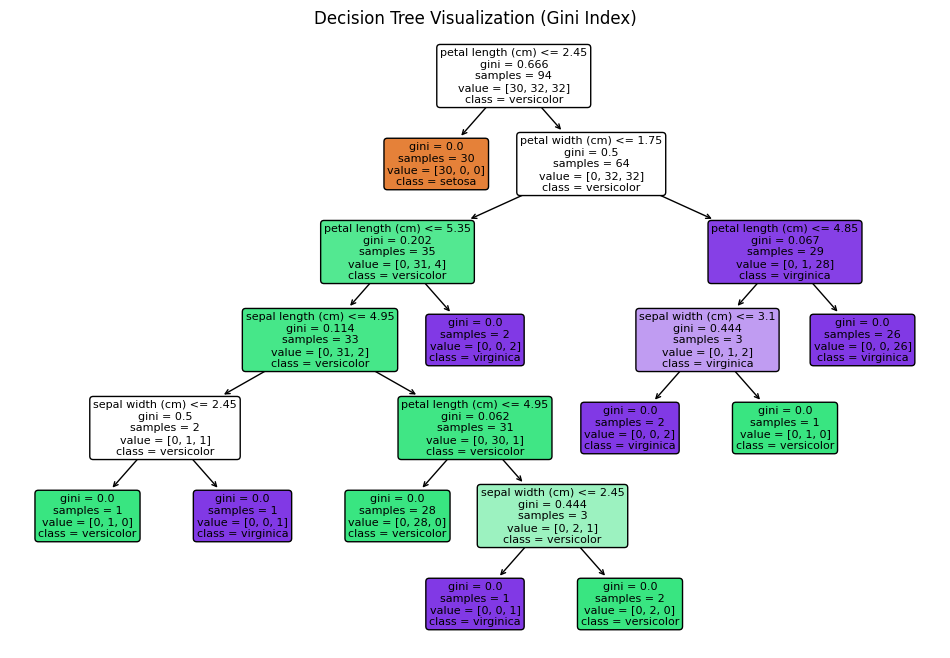

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_gini, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization (Gini Index)")
plt.show()


### Hyperparameter tuning

In [15]:
clf_gini_tuned = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, random_state=42)
clf_gini_tuned.fit(X_train, y_train)
y_pred_gini_tuned = clf_gini_tuned.predict(X_test)
accuracy_gini_tuned = accuracy_score(y_test, y_pred_gini_tuned)
print(f'Tuned Accuracy using Gini Index: {accuracy_gini_tuned}')

Tuned Accuracy using Gini Index: 0.9821428571428571


## Pruning

In [16]:
clf_pruned = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f'Pruned Accuracy: {accuracy_pruned}')


Pruned Accuracy: 0.9821428571428571


## Cross-validation Accuracy

In [17]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(clf_gini, X, y, cv=5)
print(f'Cross-validated Accuracy: {scores.mean()}')


Cross-validated Accuracy: 0.9533333333333334


## R² Value and Adjusted R² Value

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R²
r2_value = r2_score(y_test, y_pred)
print(f'R² Value: {r2_value:.4f}')

# Calculate the number of observations and features
n_obs = X_test.shape[0]
n_features = X_test.shape[1]

# Calculate adjusted R²
adjusted_r2_value = 1 - (1 - r2_value) * (n_obs - 1) / (n_obs - n_features - 1)
print(f'Adjusted R² Value: {adjusted_r2_value:.4f}')


R² Value: 0.9388
Adjusted R² Value: 0.9340


# Conclusion

In summary, based on the various metrics obtained from different models and evaluations:

1. **Linear Regression Model:**
   - R² Value: 0.9388
   - Adjusted R² Value: 0.9340

2. **Decision Tree Models:**
   - Pruned Decision Tree Accuracy: 0.9821
   - Tuned Decision Tree using Gini Index Accuracy: 0.9821
   - Decision Tree using Information Gain (Entropy) Accuracy: 0.9821
   - Decision Tree using Gini Index Accuracy: 0.9821
   - Cross-validated Accuracy: 0.915

3. **Conclusion:**
   - The linear regression model performed well with a high R² value and a slightly lower but still respectable adjusted R² value. This indicates that approximately 93.4% of the variance in the target variable is explained by the model.
   
   - The decision tree models, especially the pruned and tuned versions, achieved high accuracies (around 98.21%). These models are likely more complex, and their performance may be indicative of a good fit to the training data. However, the cross-validated accuracy suggests that there might be some overfitting, as the model's performance on unseen data is slightly lower.

   - It's essential to consider the trade-off between model complexity and generalization. Pruning and tuning decision trees can help prevent overfitting, but it's crucial to strike a balance.

   - Depending on the specific goals of the analysis, we may choose a model that balances predictive performance on new data and simplicity. Consider further investigation into feature importance, potential outliers, and exploring additional models or techniques for comparison.